In [2]:
import numpy as np 
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
import pydot

In [3]:
data = np.loadtxt('bologna_edge_info.txt')

In [18]:
def draw_graph(Graph,node_position,size_node,color_node,transparence,labels = False,linestyle = '-', figsizes = (15,15)):
    plt.figure(figsize = figsizes)
    nx.draw_networkx(Graph, pos = node_position, with_labels = labels, node_size = size_node, node_color = color_node, alpha = transparence, style = linestyle)
    plt.axis('on')
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.title('Bologna')
    plt.show()

The Graph is undirected


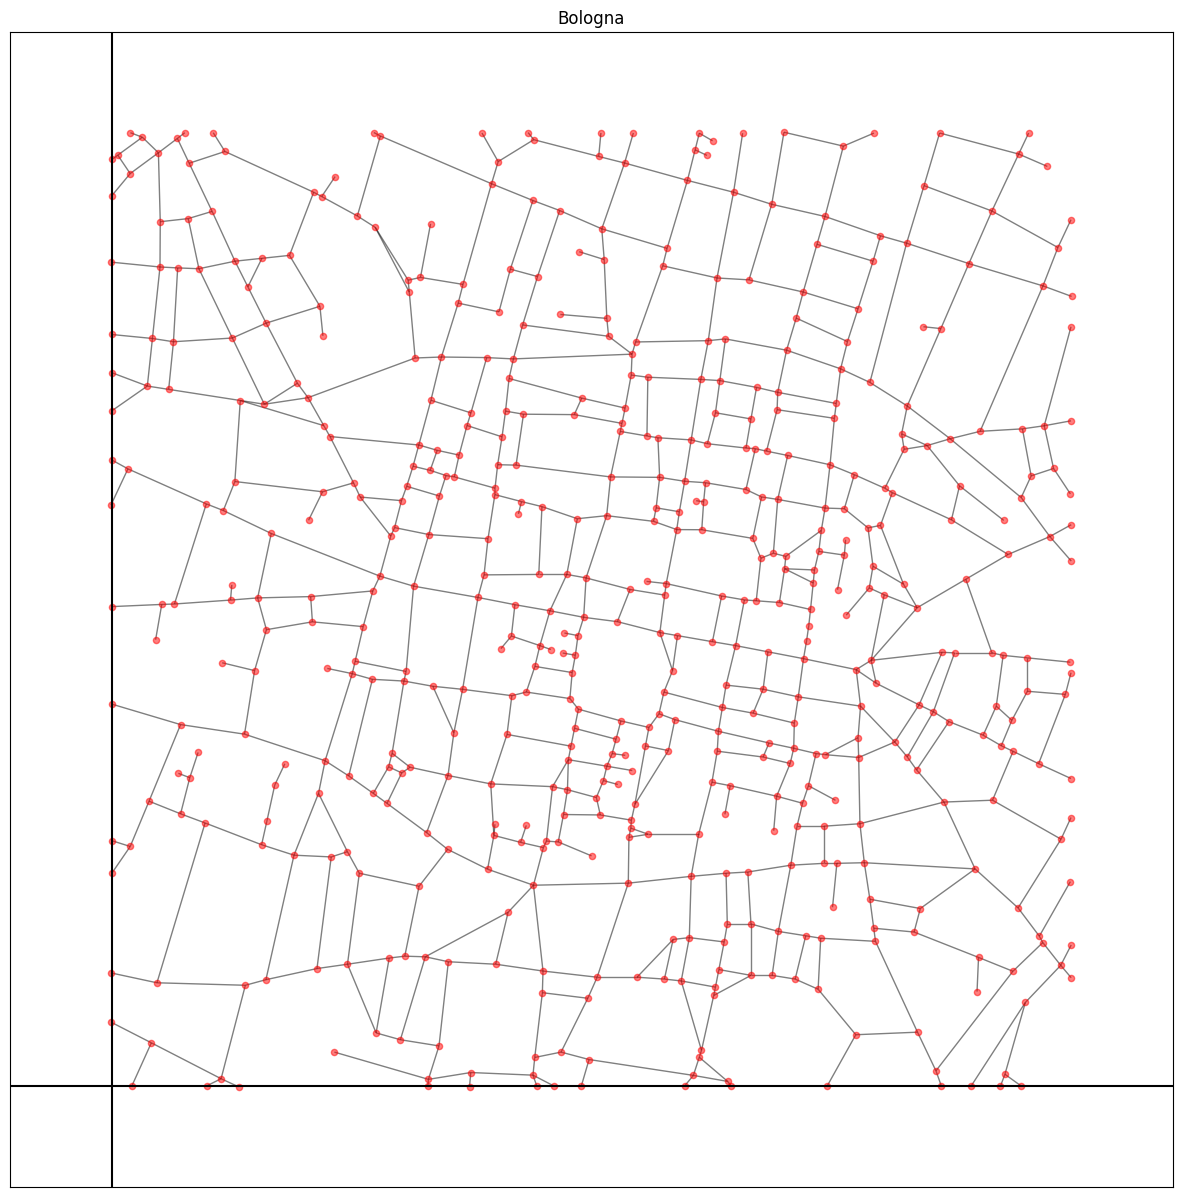

In [7]:
G = nx.Graph()
labels = False
size_node = 20
color_node = 'red'
transparence = 0.5
linestyle = '-'

node_position = {}
lenghts = []

for i in range(data.shape[0]):
    lenghts.append(data[i][7])


max_lenght = np.max(lenghts)

for i in range(data.shape[0]):
    G.add_edge(data[i][1],data[i][4], weight = data[i][7]/max_lenght)
    node_position[data[i][1]] = np.array([data[i][2],data[i][3]])
    node_position[data[i][4]] = np.array([data[i][5],data[i][6]])

if(nx.is_directed(G)):
    print("The Graph is directed")
else:
    print("The Graph is undirected")


elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.7]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.7]

'''nx.draw_networkx_nodes(G, pos = node_position, node_size=30, alpha = transparence)
nx.draw_networkx_edges(G, pos = node_position, edgelist = elarge, width = 0.5)
nx.draw_networkx_edges(G, pos = node_position, edgelist = esmall, width = 0.1)
edge_label = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos = node_position, edge_labels = edge_label, font_size = 5)'''

#print(node_position)
plt.figure(figsize = (15,15))
nx.draw_networkx(G, pos = node_position, with_labels = labels, node_size = size_node, node_color = color_node, alpha = transparence, style = linestyle)
#plt.figure(figsize = (50,50))
plt.axis('on')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.title('Bologna')
#plt.rcParams['figure.figsize'] = [20, 20]
plt.show()

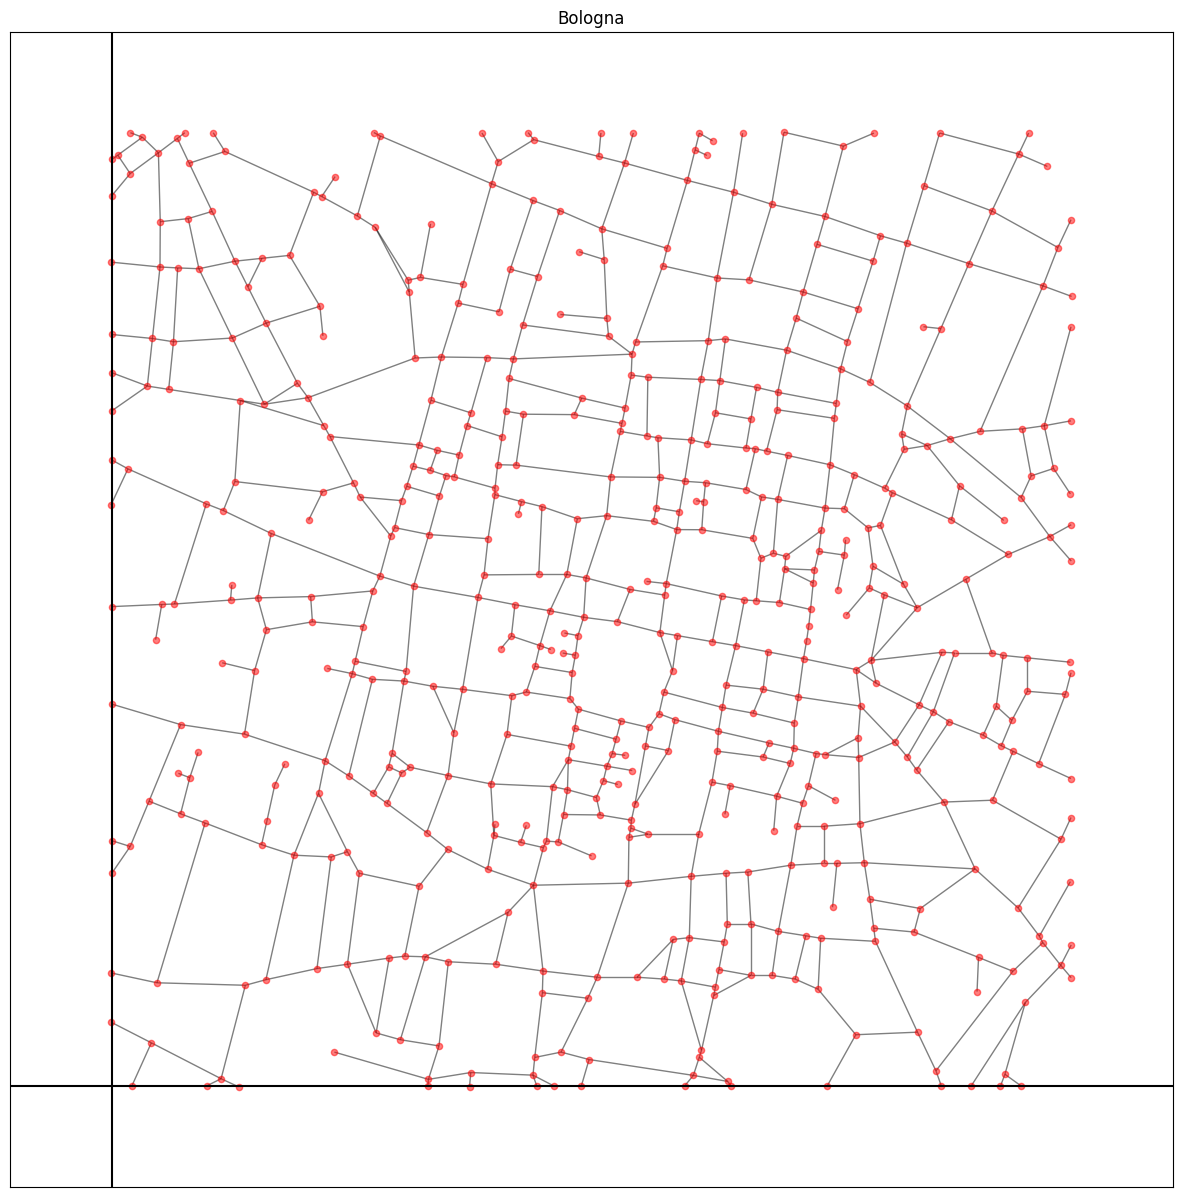

In [21]:
draw_graph(G,node_position,size_node,color_node,transparence)